Assignment: MNIST Digit Classification Using Dense Neural Networks

Objective:
Train a feedforward neural network (Dense/MLP) to classify handwritten digits from the MNIST dataset and explore the effects of network architecture and activation functions on performance.

https://www.kaggle.com/datasets/hichamachahboun/mnist-handwritten-digits

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

# Set the folder path
folder_path = '/content/drive/MyDrive/Colab Notebooks/archive (1)/'

# Load the files
X_train = np.load(folder_path + 'train_images.npy')
y_train = np.load(folder_path + 'train_labels.npy')
X_test = np.load(folder_path + 'test_images.npy')

print(X_train.shape, y_train.shape, X_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28)


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Flatten images for Dense network
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# بناء النموذج
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # الطبقة الأولى
    Dense(64, activation='relu'),                        # الطبقة المخفية
    Dense(10, activation='softmax')                      # طبقة الإخراج (10 فئات)
])

# تجميع النموذج
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# عرض ملخص النموذج
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8715 - loss: 0.4525 - val_accuracy: 0.9507 - val_loss: 0.1661
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9645 - loss: 0.1202 - val_accuracy: 0.9680 - val_loss: 0.1092
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0791 - val_accuracy: 0.9691 - val_loss: 0.0966
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9811 - loss: 0.0592 - val_accuracy: 0.9755 - val_loss: 0.0847
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9764 - val_loss: 0.0820
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.9733 - val_loss: 0.1014
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0287 - val_accuracy: 0.9738 - val_loss: 0.1046
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9919 - loss: 0.0237 -

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.1206
Validation Accuracy: 0.9771


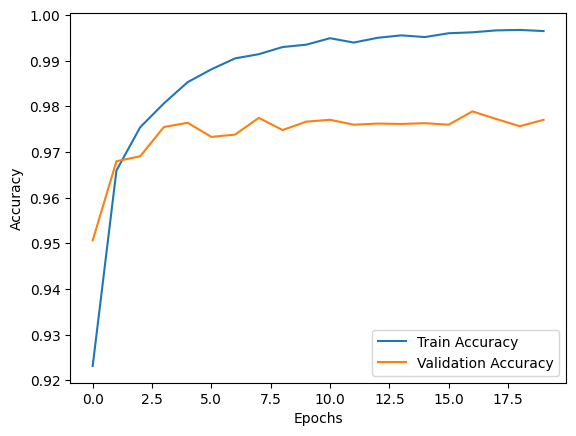

In [ ]:
# تقييم النموذج على مجموعة التحقق
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# رسم دقة التدريب والتحقق
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# التنبؤ بالفئات على مجموعة الاختبار
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# حفظ النتائج في ملف CSV (لرفعها إلى Kaggle إذا أحببت)
import pandas as pd

submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels)+1), 'Label': predicted_labels})
submission.to_csv('mnist_submission.csv', index=False)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


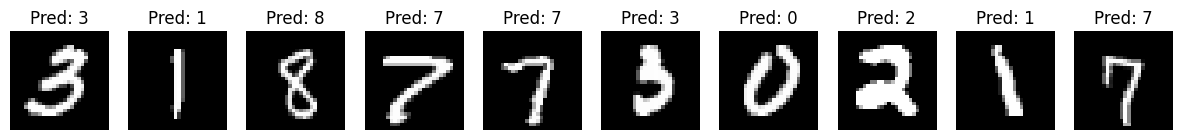

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# اختر 10 صور عشوائية من مجموعة الاختبار
num_samples = 10
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    # استعادة شكل الصورة (28x28)
    img = X_test[idx].reshape(28, 28)

    # التنبؤ بالفئة
    predicted_label = predicted_labels[idx]

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {predicted_label}')
    plt.axis('off')

plt.show()
